In [1]:
import tensorflow as tf
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()
train_x,test_x = np.expand_dims(train_x,axis=-1),np.expand_dims(test_x,axis=-1)
train_x,test_x = train_x.astype(dtype=np.float32),test_x.astype(dtype=np.float32)

temp_x = np.zeros((train_y.size,train_y.max()+1))
temp_x[np.arange(train_y.size),train_y] = 1
train_y = temp_x

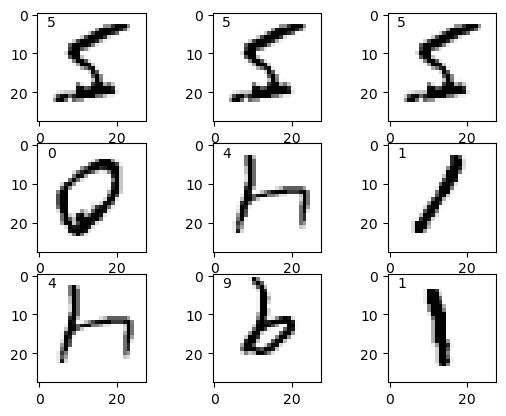

In [12]:
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        img = np.squeeze(train_x[i*(j+1)])
        img = np.rot90(img)
        img = np.rot90(img)
        ax[i,j].imshow(img,cmap="Greys")
        ax[i,j].text(2,3,np.argmax(train_y[i*(j+1)]))

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1,kernel_size=(5,5),activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(1e-2, 100000, 1e-6, power=0.95)
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate_fn, clipnorm=1.0, epsilon=1e-08),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=[
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision()
])

In [21]:
model.fit(train_x,train_y)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3272 - recall: 0.8885 - precision: 0.9193


In [20]:
prd = model.predict(test_x)
p = np.argmax(prd,axis=1)

np.where(p==test_y)[0].shape

313/313 [==============================] - 0s 1ms/step


(8930,)